In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import make_blobs
from inspect import signature as sig
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [12]:
X_test

array([[ 0.,  0., 11., ..., 13., 16.,  8.],
       [ 0.,  1., 15., ...,  1.,  0.,  0.],
       [ 0.,  2., 13., ..., 16., 16.,  3.],
       ...,
       [ 0.,  0., 11., ...,  7.,  0.,  0.],
       [ 0.,  0.,  5., ...,  7.,  0.,  0.],
       [ 0.,  2., 14., ...,  6.,  0.,  0.]])

# 불균형 데이터 셋에 대한 더미분류기와 결정트리분류기의 정확도 비교

In [11]:
# 항상 가장 많은 레이블 값으로 예측하는 분류기를 만들어보자. -> 그래도 정확도가 90%나 된다.
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy ="most_frequent").fit(X_train, y_train)

# 테스트 셋을 넣어서 예측하고 정확도를 보자.
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 유니크 레이블: {}". format(np.unique(pred_most_frequent))) # 어떤 값을 가지는 지 본다.-> False밖에 안 가지네?
print("테스트 점수 : {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 유니크 레이블: [False]
테스트 점수 : 0.90


In [18]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: ", round(tree.score(X_test, y_test),2))
# 결정트리분류기 모델을 사용했건만 정확도는 2% 밖에 늘지 않았다.

테스트 점수:  0.92


# 불균형 데이터 셋에 대한 더미분류기와 로지스틱회귀분류기의 정확도 비교

In [24]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier(strategy = "stratified").fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("더미분류기의 정확도 점수 : ", dummy.score(X_test, y_test))
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("로지스틱휘귀분류기의 정확도 점수 : ",logreg.score(X_test, y_test))

더미분류기의 정확도 점수 :  0.8088888888888889
로지스틱휘귀분류기의 정확도 점수 :  0.9844444444444445


- 결론 : 불균형 데이터셋에서 예측 성능을 정량화하는 데 정확도는 적절한 측정 방법이 아니다.
--> pred_most_frequent와 pred_dummy 처럼 빈도나 무작위 기반 예측보다 얼마나 나은지를 알려줄 수 있는 평가 지표가 필요하다. 

# 1. 오차 행렬(confusion matrix)
이진 분류 평가 결과를 나타낼 때 가장 널리 사용되는 방법 중 하나

In [26]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차행렬 : \n", confusion)

오차행렬 : 
 [[402   1]
 [  6  41]]


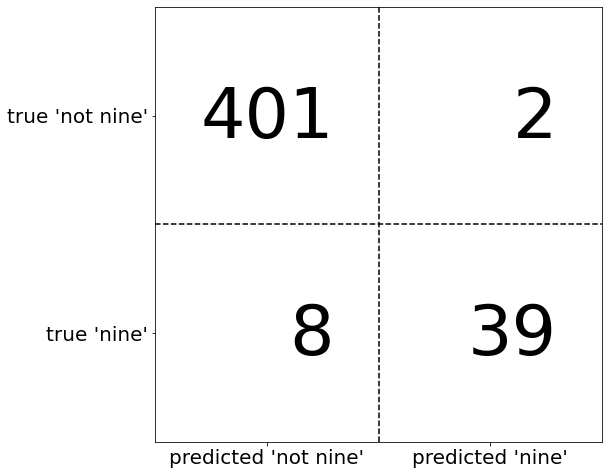

In [30]:
mglearn.plots.plot_confusion_matrix_illustration()

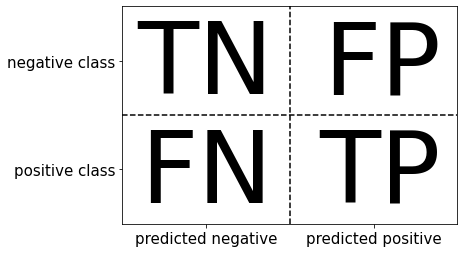

In [29]:
mglearn.plots.plot_binary_confusion_matrix()

=> 좋은 모델은 진짜 양성(TP)과 진짜 거짓(TN)이 많고, 거짓 양성(FP)과 거짓 음성(FN)이 적은 것!

In [33]:
from sklearn.metrics import f1_score, precision_score, recall_score

for predict in [pred_most_frequent, pred_dummy, pred_tree, pred_logreg] : 
    print("정밀도 : ", precision_score(y_test, predict))
    print("재현율 : ", recall_score(y_test, predict))
    print("f1-score : ", f1_score(y_test, predict))
    print("\n")

정밀도 :  0.0
재현율 :  0.0
f1-score :  0.0


정밀도 :  0.08333333333333333
재현율 :  0.06382978723404255
f1-score :  0.07228915662650602


정밀도 :  0.6388888888888888
재현율 :  0.48936170212765956
f1-score :  0.5542168674698795


정밀도 :  0.9761904761904762
재현율 :  0.8723404255319149
f1-score :  0.9213483146067415




In [36]:
from sklearn.metrics import classification_report
for predict in [pred_most_frequent, pred_dummy, pred_tree, pred_logreg] : 
    print(classification_report(y_test, predict, target_names =["9아님을 True(양성)라 할 경우", "9를 True(양성)라 할 경우"]))

                     precision    recall  f1-score   support

9아님을 True(양성)라 할 경우       0.90      1.00      0.94       403
  9를 True(양성)라 할 경우       0.00      0.00      0.00        47

           accuracy                           0.90       450
          macro avg       0.45      0.50      0.47       450
       weighted avg       0.80      0.90      0.85       450

                     precision    recall  f1-score   support

9아님을 True(양성)라 할 경우       0.89      0.92      0.91       403
  9를 True(양성)라 할 경우       0.08      0.06      0.07        47

           accuracy                           0.83       450
          macro avg       0.49      0.49      0.49       450
       weighted avg       0.81      0.83      0.82       450

                     precision    recall  f1-score   support

9아님을 True(양성)라 할 경우       0.94      0.97      0.95       403
  9를 True(양성)라 할 경우       0.64      0.49      0.55        47

           accuracy                           0.92       450
          macro 

 weighted avg  : 무엇을 양성으로 할건지에 대해 각 점수가 나오고 그것을 클래스 샘플 수에 따라 가중치 평균낸 값

 --> 어떤 클래스를 양성 클래스로 선택하느냐가 평가 지표에 큰 영향을 끼친다. 
 
     (9아님이 True일 때는 무작위 더미 모델과 로지스틱 회귀모델의 차이가 크지 않지만,
      
      9가 True일 때는 확연히 차이가 난다.)

# 2. ROC와 AUC --> 핸즈온에서...